In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# import and check the data

In [2]:
def check_data_quality(df):
    print("The shape:")
    print(df.shape)

    missing_values = df.isna().sum()
    if missing_values.sum() == 0:
        print("\nNo missing values found.")
    else:
        print("Columns with missing values:")
        print(missing_values[missing_values != 0])

    print("\nData types:")
    print(df.dtypes)
    
    print("\nUnique types:")
    print(df.nunique())

    print("\nSummary Statistics:")
    df.describe()

    df.hist(bins=50, figsize=(20,15))
    
    
    
def position_to_number(pos):
    if pos == 'PG':
        return 1
    elif (pos == 'PG-SG' or pos == 'SG-PG'):
        return 1.5
    elif (pos == 'SG' or pos == 'SG-PG-SF'):
        return 2
    elif (pos == 'SG-SF' or pos == 'SF-SG'):
        return 2.5
    elif pos == 'SF':
        return 3
    elif pos == 'PF-SF':
        return 3.5
    elif pos == 'PF':
        return 4
    elif pos == 'C-PF':
        return 4.5
    elif pos == 'C':
        return 5
    
    

def add_season_column(df):
    seasons = []
    current_season = 1980
    count = 0
    
    for index, row in df.iterrows():
        if row['Rk'] == 1 and count > 100:
            current_season += 1
            count = 0
        count += 1
        seasons.append(current_season)

    df['Season'] = seasons
    df.drop(df.columns[[19, 24, 29]], axis=1, inplace=True)
    df['Pos'] = df['Pos'].apply(position_to_number)
    del df["Rk"]
    df = df.dropna()
    return df

def add_target(group, targets):
    for target in targets:
        group[target + " Next Season"] = group[target].shift(-1)
    group.dropna(subset=[target + " Next Season" for target in targets], inplace=True)
    return group

In [3]:
df = add_season_column(pd.read_csv("nba_player_1980-2022.csv"))
df.head(3)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season
0,Kareem Abdul-Jabbar*,5.0,32.0,LAL,82.0,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.8,2.4,7.2,7.3,1980
1,Tom Abernethy,4.0,25.0,GSW,67.0,1222.0,11.0,0.511,0.003,0.258,5.4,12.0,8.6,9.3,1.4,0.6,9.9,13.3,1.2,0.8,2.0,0.080,-1.0,-0.2,-1.2,0.2,1980
2,Alvan Adams,5.0,25.0,PHO,75.0,2168.0,19.2,0.571,0.002,0.270,8.2,22.4,15.4,21.6,2.3,1.4,18.2,21.9,3.1,3.9,7.0,0.155,1.7,1.9,3.6,3.1,1980


In [4]:
df[df['Player'] == 'Stephen Curry'].head(3)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season
14285,Stephen Curry,1.0,21.0,GSW,80.0,2896.0,16.3,0.568,0.332,0.175,1.8,12.0,6.8,24.6,2.5,0.5,16.5,21.8,3.0,1.6,4.7,0.077,1.1,-0.5,0.7,2.0,2010
14896,Stephen Curry,1.0,22.0,GSW,74.0,2489.0,19.4,0.595,0.325,0.216,2.3,10.9,6.5,28.1,2.2,0.6,16.4,24.4,5.4,1.3,6.6,0.128,3.0,-0.7,2.3,2.7,2011
15477,Stephen Curry,1.0,23.0,GSW,26.0,732.0,21.2,0.605,0.409,0.159,2.3,11.3,6.8,32.3,2.8,0.8,17.0,24.0,1.8,0.4,2.2,0.144,4.1,0.3,4.3,1.2,2012


The shape:
(22963, 27)

No missing values found.

Data types:
Player     object
Pos       float64
Age       float64
Tm         object
G         float64
MP        float64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
Season      int64
dtype: object

Unique types:
Player    3463
Pos          9
Age         27
Tm          41
G           85
MP        3217
PER        569
TS%        630
3PAr       862
FTr        920
ORB%       314
DRB%       421
TRB%       328
AST%       520
STL%       119
BLK%       138
TOV%       413
USG%       417
OWS        174
DWS         88
WS         203
WS/48      825
OBPM       391
DBPM       238
BPM        473
VORP       128
Season      44
dtype: int64

Summ

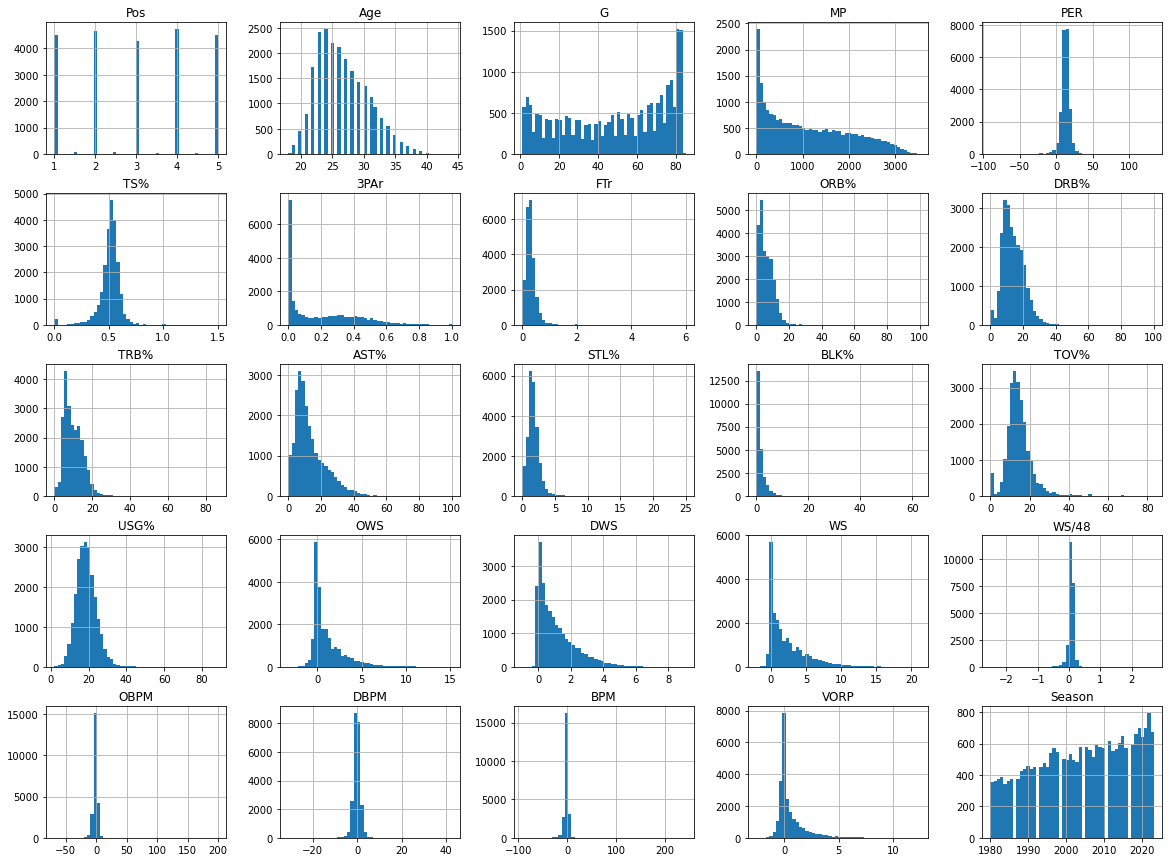

In [5]:
check_data_quality(df)

# prepairing the data 

In [6]:
df['Player'] = df['Player'].str.rstrip('*')
df = df[df['G'] > 20]
df['Next_Season'] = df['Season'] + 1

target_list = ['WS', 'PER']  # List of targets
df = df.groupby("Player").apply(lambda x: add_target(x, target_list))
df.reset_index(drop=True, inplace=True)

In [7]:
df[df['Player']=='Deni Avdija']

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season,Next_Season,WS Next Season,PER Next Season
3742,Deni Avdija,3.0,20.0,WAS,54.0,1257.0,7.6,0.515,0.538,0.144,1.9,20.2,11.0,6.3,1.2,1.0,9.0,12.0,0.0,1.2,1.2,0.046,-3.6,0.4,-3.1,-0.4,2021,2022,2.4,11.6
3743,Deni Avdija,3.0,21.0,WAS,82.0,1984.0,11.6,0.536,0.447,0.235,3.0,20.5,11.9,11.8,1.5,1.9,12.0,16.3,0.6,1.8,2.4,0.058,-2.1,0.4,-1.7,0.1,2022,2023,2.3,11.2


# Supervised
Exploratory data analysis

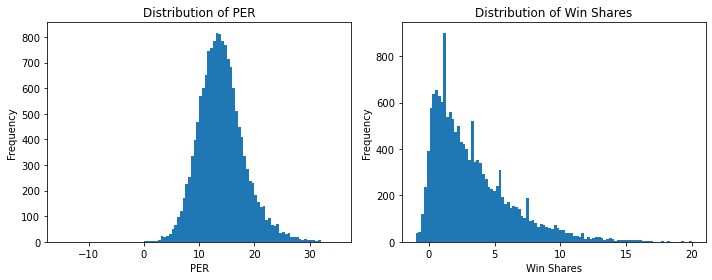

In [8]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the histogram for PER
axs[0].hist(df['PER'], bins=100, range=(-15, 35))
axs[0].set_title('Distribution of PER')
axs[0].set_xlabel('PER')
axs[0].set_ylabel('Frequency')

# Plot the histogram for Win Shares (WS)
axs[1].hist(df['WS'], bins=100, range=(-1, 20))
axs[1].set_title('Distribution of Win Shares')
axs[1].set_xlabel('Win Shares')
axs[1].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

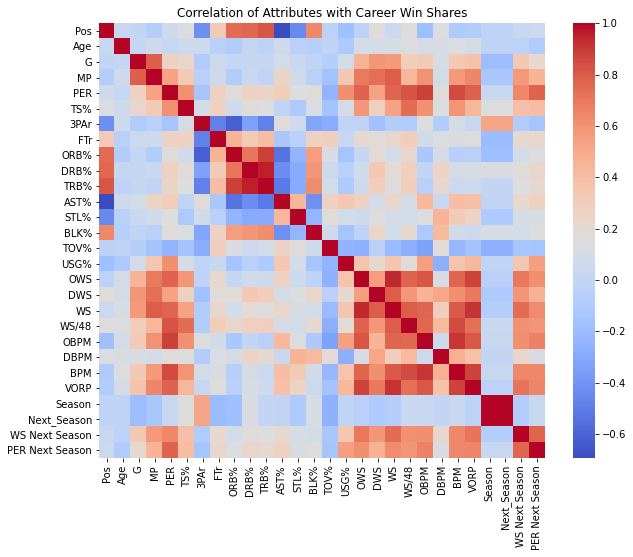

In [9]:
# Calculate the correlation matrix
correlation_matrix = df[df.columns.tolist()].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation of Attributes with Career Win Shares')
plt.show()

# Auto ML

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.linear_model import HuberRegressor

def generate_predictions(model, X):
    predictions = model.predict(X)
    return predictions

def evaluate_models(models, X, y, test_size=0.2, random_state=42):
    results = []

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    for model_name, model in models:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Generate predictions on the entire dataset
        predictions = generate_predictions(model, X_test)

        # Calculate evaluation metrics
        rmse = mean_squared_error(y_test, predictions, squared=False)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        # Store the results in a dictionary
        result = {
            'Model': model_name,
            'RMSE': rmse,
            'MAE': mae,
            'R2 Score': r2,
        }
        results.append(result)

    metrics_df = pd.DataFrame(results)
    return metrics_df

In [11]:
# Define the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('Huber Regression', HuberRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('XGBoost', xgb.XGBRegressor()),
    ('LightGBM', lgb.LGBMRegressor()),
    ('MLP', MLPRegressor()),
    ('GBM', GradientBoostingRegressor()),
    ('CatBoost', CatBoostRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('Extra Trees', ExtraTreesRegressor()),
    ('Kernel Ridge', KernelRidge())
]

removed_columns = ['Player', 'Tm', 'OWS', 'WS Next Season', 'PER Next Season']
selected_columns = df.columns[~df.columns.isin(removed_columns)]

X = df[selected_columns].values
y_WS = df['WS Next Season'].values

X = df[selected_columns].values
y_PER = df['PER Next Season'].values

# Choose the 'Gradient Boosting' model

In [12]:
# Split data for WS model
X_train_WS, X_test_WS, y_train_WS, y_test_WS = train_test_split(X, y_WS, test_size=0.2)

# Train WS model
extra_trees_WS = GradientBoostingRegressor()
extra_trees_WS.fit(X_train_WS, y_train_WS)

# Make predictions for WS
df['Predictions_WS'] = extra_trees_WS.predict(X)

In [13]:
# Split data for PER model
X_train_PER, X_test_PER, y_train_PER, y_test_PER = train_test_split(X, y_PER, test_size=0.2)

# Train PER model
extra_trees_PER = GradientBoostingRegressor()
extra_trees_PER.fit(X_train_PER, y_train_PER)

# Make predictions for PER
df['Predictions_PER'] = extra_trees_PER.predict(X)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def print_evaluation_metrics(model, X, y_true):
    predictions = model.predict(X)
    rmse = mean_squared_error(y_true, predictions, squared=False)
    mae = mean_absolute_error(y_true, predictions)
    r2 = r2_score(y_true, predictions)
    
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2 Score:", r2)

In [18]:
# Print evaluation metrics for WS model
print("Evaluation Metrics for WS Model:")
print_evaluation_metrics(extra_trees_WS, X_test_WS, y_test_WS)

print()

print("Evaluation Metrics for WS Model:")
print_evaluation_metrics(extra_trees_PER, X_test_PER, y_test_PER)

Evaluation Metrics for WS Model:
RMSE: 1.91266711154548
MAE: 1.442454708964319
R2 Score: 0.6098929658898955
Evaluation Metrics for WS Model:
RMSE: 2.511814774678729
MAE: 1.9474134898351592
R2 Score: 0.6619668902740061


# Results

In [16]:
def plot_model_results(model, X_test, y_test, target_name):
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate feature importances
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': selected_columns, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Scatter plot of True vs. Predicted Values
    ax1.scatter(y_test, predictions)
    ax1.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    ax1.set_xlabel('True Values')
    ax1.set_ylabel('Predicted Values')
    ax1.set_title(f'Scatter Plot of True vs. Predicted Values ({target_name})')
    
    # Bar plot of Feature Importance
    ax2.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    ax2.set_xlabel('Importance')
    ax2.set_ylabel('Features')
    ax2.set_title(f'Feature Importance ({target_name})')
    ax2.invert_yaxis()  # Invert the y-axis to display features from top to bottom
    
    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.4)
    
    # Display the figure
    plt.show()

In [17]:
plot_model_results(extra_trees_WS, X_test_WS, y_test_WS, 'WS')
plot_model_results(extra_trees_PER, X_test_PER, y_test_PER, 'PER')

NameError: name 'best_model_WS' is not defined

In [ ]:
df['Similar_Player'] = df.apply(lambda row: df.loc[(df['Pos'] == row['Pos']) & 
                                                   (df['Player'] != row['Player']), ['WS', 'PER']]
                                                    .sub([row['Predictions_WS'], row['Predictions_PER']]).abs().sum(axis=1).idxmin(), axis=1)

df['Similar_Player_Season'] = df['Similar_Player'].apply(lambda x: df.loc[x, 'Season'] if pd.notnull(x) else np.nan)
df['Similar_Player'] = df['Similar_Player'].apply(lambda x: df.loc[x, 'Player'] if pd.notnull(x) else np.nan)

In [ ]:
selected_columns = ['Player','Next_Season', 'Similar_Player', 'Similar_Player_Season']
df_results = df[selected_columns].copy()
df_results

In [ ]:
selected_players = ['Deni Avdija', 'Omri Casspi', 'LeBron James', 'Michael Jordan']
best_players = df_results.loc[df_results['Player'].isin(selected_players)]

# Group by 'Player' and select the first two seasons for each player
best_players.groupby('Player').head(2)

In [ ]:
df